### Information we would like to find out, using the data. 


- Top 5 teams that played the most minutes
- The top 5 teams that took penalties
- Top 5 teams that had the most yellow and red cards
- Top 5 teams with the most goals

In [3]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
# make sure to create config file in vscode
from config import password 


### Store CSV into DataFrame

In [4]:
# Load csv file
csv_file = "team_data.csv"
team_df = pd.read_csv(csv_file)
team_df.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [5]:
# Load csv file
csv_file = "group_stats.csv"
group_df = pd.read_csv(csv_file)
group_df.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,3,1,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,4,2,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97


In [6]:
# merge both tables
team_data_combined = pd.merge(group_df, team_df, how ="left", on=["team", "team"])


In [7]:
#Check table has merged
team_data_combined.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,87.0,50.0,8.0,0.0,1.0,0.0,241.0,79.0,70.0,53.0
1,1,1,2,Senegal,3,2,0,1,5,4,...,48.0,57.0,8.0,1.0,0.0,0.0,192.0,72.0,63.0,53.3
2,2,1,3,Ecuador,3,1,1,1,4,3,...,50.0,37.0,8.0,1.0,1.0,0.0,135.0,50.0,49.0,50.5
3,3,1,4,Qatar,3,0,0,3,1,7,...,31.0,45.0,7.0,0.0,1.0,0.0,138.0,36.0,38.0,48.6
4,4,2,1,England,3,2,1,0,9,2,...,53.0,65.0,5.0,2.0,1.0,0.0,227.0,60.0,66.0,47.6


### Create new data with select columns

In [8]:
# Select columns to keep
team_data_new = team_data_combined [['team', 'group', 'minutes', 'goals', 'pens_made', 'goals_pens', 'cards_yellow', 'cards_red']].copy()
team_data_new

,team,group,minutes,goals,pens_made,goals_pens,cards_yellow,cards_red
0,Netherlands,1,480.0,10.0,0.0,10.0,12.0,1.0
1,Senegal,1,360.0,5.0,1.0,4.0,7.0,0.0
2,Ecuador,1,270.0,4.0,1.0,3.0,3.0,0.0
3,Qatar,1,270.0,1.0,0.0,1.0,7.0,0.0
4,England,2,450.0,13.0,1.0,12.0,1.0,0.0
5,United States,2,360.0,3.0,0.0,3.0,5.0,0.0
6,IR Iran,2,NaN,NaN,NaN,NaN,NaN,NaN
7,Wales,2,270.0,1.0,1.0,0.0,5.0,1.0
8,Argentina,3,690.0,15.0,4.0,11.0,17.0,0.0
9,Poland,3,360.0,3.0,1.0,2.0,7.0,0.0


In [9]:
#rename headers
team_data_new.rename(columns = {team_data_new.columns[1]:"groups"}, inplace = True)

In [10]:
# Check the coloumn has been renamed
team_data_new

,team,groups,minutes,goals,pens_made,goals_pens,cards_yellow,cards_red
0,Netherlands,1,480.0,10.0,0.0,10.0,12.0,1.0
1,Senegal,1,360.0,5.0,1.0,4.0,7.0,0.0
2,Ecuador,1,270.0,4.0,1.0,3.0,3.0,0.0
3,Qatar,1,270.0,1.0,0.0,1.0,7.0,0.0
4,England,2,450.0,13.0,1.0,12.0,1.0,0.0
5,United States,2,360.0,3.0,0.0,3.0,5.0,0.0
6,IR Iran,2,NaN,NaN,NaN,NaN,NaN,NaN
7,Wales,2,270.0,1.0,1.0,0.0,5.0,1.0
8,Argentina,3,690.0,15.0,4.0,11.0,17.0,0.0
9,Poland,3,360.0,3.0,1.0,2.0,7.0,0.0


### Store JSON data into a DataFrame

In [11]:
import json
from pprint import pprint
j=open ('team_tips.json')
a=json.load(j)
pprint(a)


[{'aerials_lost': 'Aerials lost',
  'aerials_won': 'Aerials won',
  'aerials_won_pct': 'Percentage of aerials won Minimum .97 aerial duels per '
                     'squad game to qualify as a leader',
  'assisted_shots': 'Passes that directly lead to a shot (assisted shots)',
  'assists': 'Assists',
  'assists_per90': 'Assists per 90 minutes Minimum 30 minutes played per squad '
                   'game to qualify as a leader',
  'average_shot_distance': 'Average distance, in yards, from goal of all shots '
                           'taken Minimum .395 shots per squad game to qualify '
                           'as a leader Does not include penalty kicks',
  'avg_age': 'Age is weighted by minutes played',
  'ball_recoveries': 'Number of loose balls recovered',
  'blocked_passes': 'Number of times blocking a pass by standing in its path',
  'blocked_shots': 'Number of times blocking a shot by standing in its path',
  'blocks': 'Number of times blocking the ball by standing in its pa

In [12]:
json_file = "team_tips.json"
team_tips_df = pd.read_json(json_file,)
team_tips_df.head()

,players_used,avg_age,possession,games,games_starts,minutes_90s,goals,assists,goals_pens,pens_made,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Number of Players used in Games,Age is weighted by minutes played,Possession Calculated as the percentage of p...,Matches Played by the player or squad,Game or games started by player,90s played Minutes played divided by 90,Goals scored or allowed,Assists,Non-Penalty Goals,Penalty Kicks Made,...,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Number of loose balls recovered,Aerials won,Aerials lost,Percentage of aerials won Minimum .97 aerial d...


### Clean DataFrame

In [13]:
new_team_tips = team_tips_df[["goals", "pens_made", "goals_pens", "cards_yellow", "cards_red"]].copy()
new_team_tips

,goals,pens_made,goals_pens,cards_yellow,cards_red
0,Goals scored or allowed,Penalty Kicks Made,Non-Penalty Goals,Yellow Cards,Red Cards


In [26]:
new_team_tips['id'] = 1

In [27]:
new_team_tips

,goals,pens_made,goals_pens,cards_yellow,cards_red,id
0,Goals scored or allowed,Penalty Kicks Made,Non-Penalty Goals,Yellow Cards,Red Cards,1


### Connect to local database

In [14]:
protocol = 'postgresql'
#username = 'enterprisedb'  # Potentially yours is'postgresql'
username = 'postgres'
#password = "aman"

host = 'localhost'
port = 5432                # Potentially yours is 5432 (5444)
database_name = 'fifa_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

### Check for tables

In [18]:
engine.table_names()

/var/folders/xn/zsfqtzcx4t9dbvmg4mq2kb640000gn/T/ipykernel_721/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['teams', 'description']

### Use pandas to load csv converted DataFrame into database

In [16]:
team_data_new.to_sql(name='teams', con=engine, if_exists='append', index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "teams_pkey"
DETAIL:  Key (team)=(Netherlands) already exists.

[SQL: INSERT INTO teams (team, groups, minutes, goals, pens_made, goals_pens, cards_yellow, cards_red) VALUES (%(team)s, %(groups)s, %(minutes)s, %(goals)s, %(pens_made)s, %(goals_pens)s, %(cards_yellow)s, %(cards_red)s)]
[parameters: ({'team': 'Netherlands', 'groups': 1, 'minutes': 480.0, 'goals': 10.0, 'pens_made': 0.0, 'goals_pens': 10.0, 'cards_yellow': 12.0, 'cards_red': 1.0}, {'team': 'Senegal', 'groups': 1, 'minutes': 360.0, 'goals': 5.0, 'pens_made': 1.0, 'goals_pens': 4.0, 'cards_yellow': 7.0, 'cards_red': 0.0}, {'team': 'Ecuador', 'groups': 1, 'minutes': 270.0, 'goals': 4.0, 'pens_made': 1.0, 'goals_pens': 3.0, 'cards_yellow': 3.0, 'cards_red': 0.0}, {'team': 'Qatar', 'groups': 1, 'minutes': 270.0, 'goals': 1.0, 'pens_made': 0.0, 'goals_pens': 1.0, 'cards_yellow': 7.0, 'cards_red': 0.0}, {'team': 'England', 'groups': 2, 'minutes': 450.0, 'goals': 13.0, 'pens_made': 1.0, 'goals_pens': 12.0, 'cards_yellow': 1.0, 'cards_red': 0.0}, {'team': 'United States', 'groups': 2, 'minutes': 360.0, 'goals': 3.0, 'pens_made': 0.0, 'goals_pens': 3.0, 'cards_yellow': 5.0, 'cards_red': 0.0}, {'team': 'IR Iran', 'groups': 2, 'minutes': None, 'goals': None, 'pens_made': None, 'goals_pens': None, 'cards_yellow': None, 'cards_red': None}, {'team': 'Wales', 'groups': 2, 'minutes': 270.0, 'goals': 1.0, 'pens_made': 1.0, 'goals_pens': 0.0, 'cards_yellow': 5.0, 'cards_red': 1.0}  ... displaying 10 of 32 total bound parameter sets ...  {'team': 'Uruguay', 'groups': 8, 'minutes': 270.0, 'goals': 2.0, 'pens_made': 0.0, 'goals_pens': 2.0, 'cards_yellow': 8.0, 'cards_red': 0.0}, {'team': 'Ghana', 'groups': 8, 'minutes': 270.0, 'goals': 5.0, 'pens_made': 0.0, 'goals_pens': 5.0, 'cards_yellow': 8.0, 'cards_red': 0.0})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

### Use pandas to load json converted DataFrame into database

In [29]:
new_team_tips.to_sql(name='description', con=engine, if_exists='append', index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "description_pkey"
DETAIL:  Key (id)=(1) already exists.

[SQL: INSERT INTO description (goals, pens_made, goals_pens, cards_yellow, cards_red, id) VALUES (%(goals)s, %(pens_made)s, %(goals_pens)s, %(cards_yellow)s, %(cards_red)s, %(id)s)]
[parameters: {'goals': 'Goals scored or allowed', 'pens_made': 'Penalty Kicks Made', 'goals_pens': 'Non-Penalty Goals', 'cards_yellow': 'Yellow Cards', 'cards_red': 'Red Cards', 'id': 1}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

### Confirm data has been added by querying the teams table
* NOTE: can also check using pgAdmin

In [30]:
pd.read_sql_query('select * from teams', con=engine)

,team,groups,minutes,goals,pens_made,goals_pens,cards_yellow,cards_red
0,Netherlands,1,480.0,10.0,0.0,10.0,12.0,1.0
1,Senegal,1,360.0,5.0,1.0,4.0,7.0,0.0
2,Ecuador,1,270.0,4.0,1.0,3.0,3.0,0.0
3,Qatar,1,270.0,1.0,0.0,1.0,7.0,0.0
4,England,2,450.0,13.0,1.0,12.0,1.0,0.0
5,United States,2,360.0,3.0,0.0,3.0,5.0,0.0
6,IR Iran,2,NaN,NaN,NaN,NaN,None,None
7,Wales,2,270.0,1.0,1.0,0.0,5.0,1.0
8,Argentina,3,690.0,15.0,4.0,11.0,17.0,0.0
9,Poland,3,360.0,3.0,1.0,2.0,7.0,0.0


### Confirm data has been added by querying the customer_location table

In [31]:
pd.read_sql_query('select * from description', con=engine).head()

,id,goals,pens_made,goals_pens,cards_yellow,cards_red
0,1,Goals scored or allowed,Penalty Kicks Made,Non-Penalty Goals,Yellow Cards,Red Cards


## Top 5 teams that played the most minutes

Text(0, 0.5, 'Minutes')

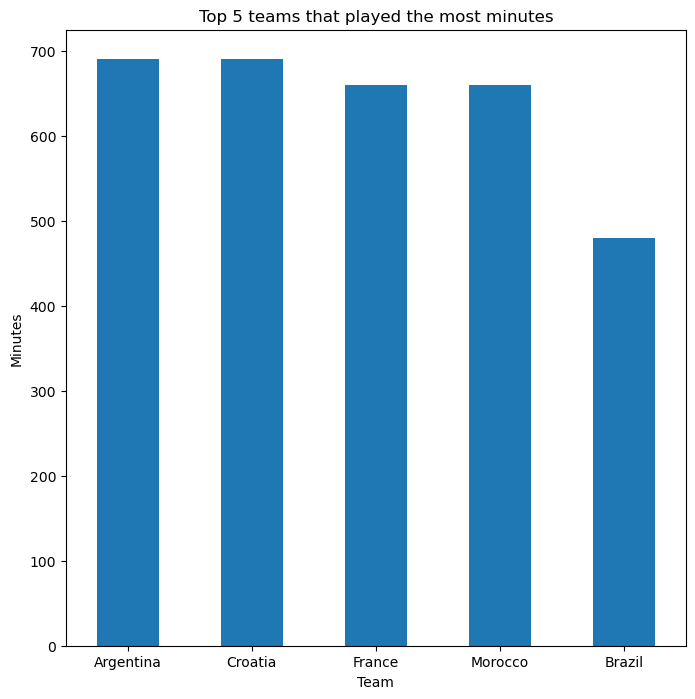

In [34]:
team_data_new.groupby('team').agg({'minutes':'sum'}).sort_values(by='minutes',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)


plt.title('Top 5 teams that played the most minutes')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Minutes')

## The top 5 teams that took penalties


Text(0, 0.5, 'Number Of Penalties')

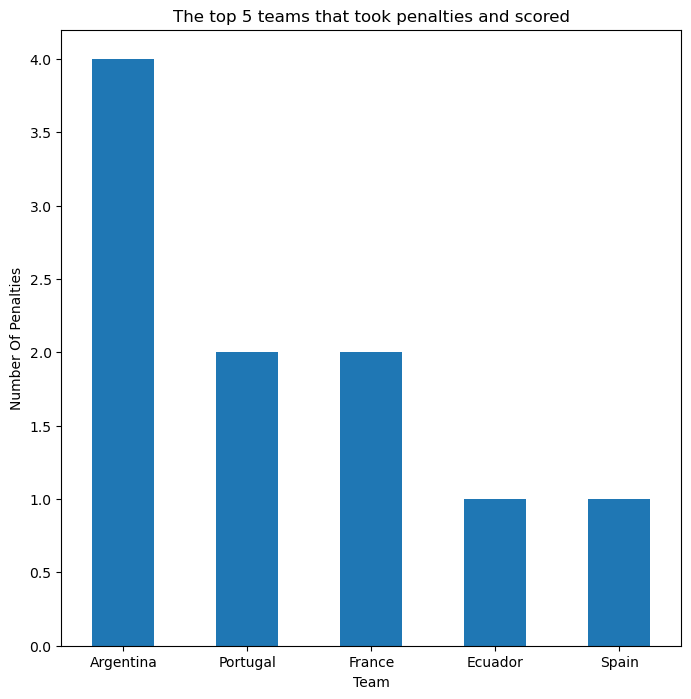

In [36]:
team_data_new.groupby('team').agg({'pens_made':'sum'}).sort_values(by='pens_made',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)


plt.title('The top 5 teams that took penalties and scored')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Penalties')

## Top 5 teams that had the most yellow and red cards


Text(0, 0.5, 'Number Of Cards')

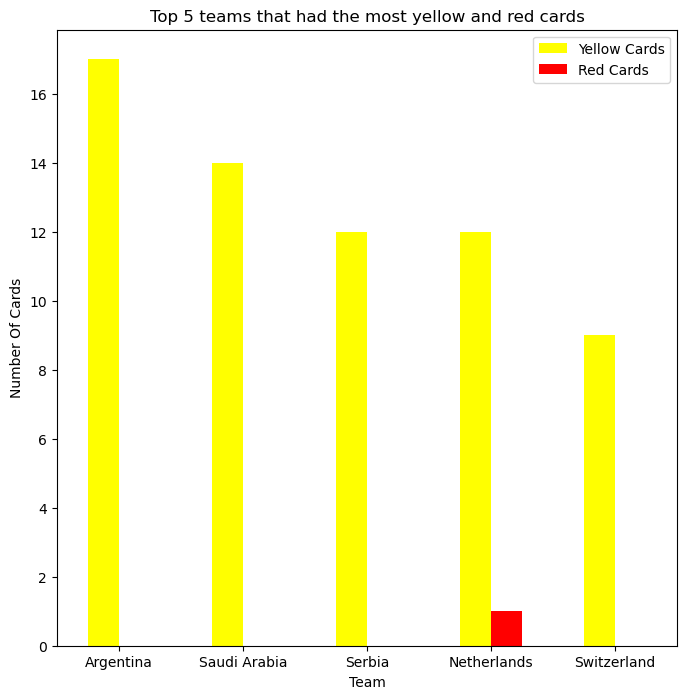

In [37]:
team_data_new.groupby('team').agg({'cards_yellow':'sum','cards_red':'sum'}).sort_values(by='cards_yellow',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False,color=['yellow','red'])

plt.legend(['Yellow Cards','Red Cards'])
plt.title('Top 5 teams that had the most yellow and red cards')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Cards')

## Top 5 teams with the most goals

Text(0.5, 0, 'Team')

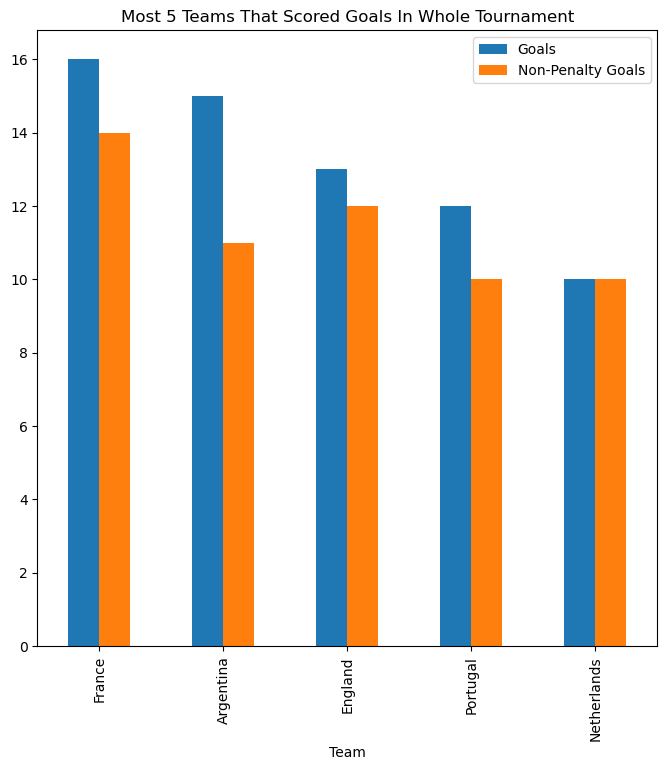

In [39]:
team_data_new.groupby('team').agg({'goals':'sum','goals_pens':'sum'}).sort_values(by='goals',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Goals','Non-Penalty Goals'])
plt.title('Most 5 Teams That Scored Goals In Whole Tournament')
plt.xlabel('Team')